<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>

## Adquisicion y preprocesamiento de datos - RafaC

### Tests
Para poder llegar a conclusiones fiables debemos conocer y saber aplicar algunos test estadísticos básicos

### Índice

[Introducción](#Introducción)<br>
[Normalidad](#Introducción)<br>
[Box-Cox](#Box-Cox)<br>
[Curtosis y asimetría](#Curtosis)<br>
[Poblaciones diferentes](#Medias)<br>

<a name="Introducción"></a>
## Introducción

En ciencia de datos no hay casi nunca certezas; al fin y al cabo tenemos unos datos particulares, una "muestra",  y por eso algunas conclusiones que saquemos pueden ser meras coincidencias o casualidades. Los tests estadísticos nos indican si una hipótesis se verifica o no con una alta probabilidad.

* Cada test va orientado a un problema concreto y plantea una hipótesis $H_0$ llamada *hipótesis nula*
* El resultados del test suele ser un valor *p* que indica la probabilidad de que se cumpla la hipótesis nula además de otros valores (a menudo un estadístico que depende del test)
* Si p<0.05 o p<0.01 (depende del nivel de exigencia) rechazamos la hipótesis nula y damos por válida la contraria, la hipótesis alternativa $H_1$
* Es importante observar que si p>0.05 no "aceptamos" la hipótesis nula, solo decimos que no hemos podido rechazarla (en la práctica a menudo esto se toma como prueba de aceptación aunque no sea correcto)

<a name="Normalidad"></a>
## Normalidad

In [1]:
from scipy.stats import normaltest
from scipy import stats

def normal(data):
    k2, p = stats.normaltest(data,nan_policy="omit")
    if p<0.05:
        msg = "Se rechaza H0: no sigue una distribución normal"
    else:    
        msg = "No se rechaza H0; no podemos descartar  una distribución normal"
    return msg,round(p,4),round(k2,4)



('No se rechaza H0; no podemos descartar  una distribución normal',
 0.9666,
 0.068)

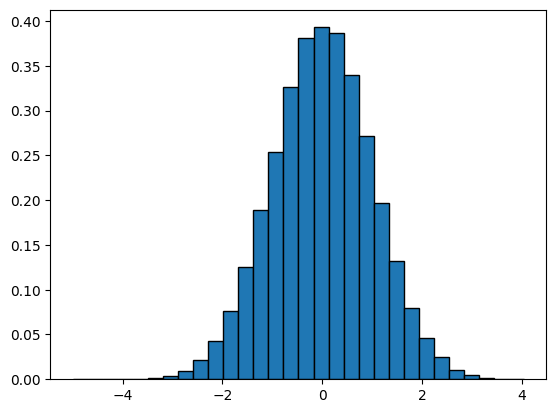

In [2]:

import numpy as np 
import matplotlib.pyplot as plt 

#generate a random numpy array with 100000 elements
normaldata = np.random.randn(100000)

plt.hist(normaldata,edgecolor="black", bins =30, density=True)

normal(normaldata)

('Se rechaza H0: no sigue una distribución normal', 0.0, 91420.4969)

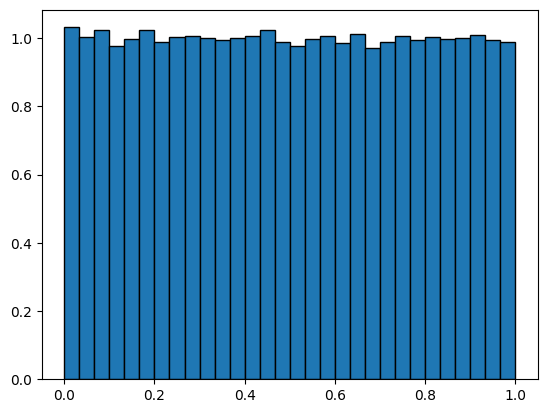

In [3]:
#generate a random numpy array with 100000 elements
uniformdata = np.random.random(100000)

plt.hist(uniformdata,edgecolor="black", bins =30, density=True)

normal(uniformdata)

('Se rechaza H0: no sigue una distribución normal', 0.0, 7999.3271)

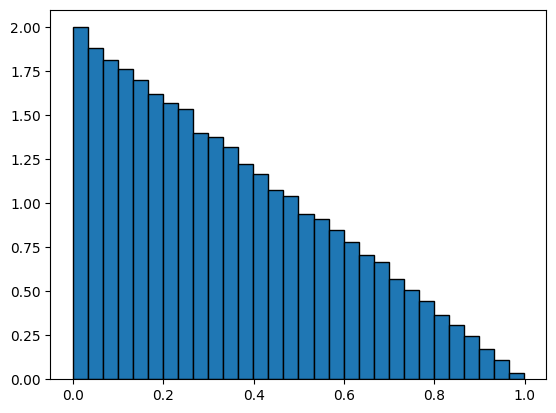

In [4]:

betadata = np.random.beta(1,2,100000)

plt.hist(betadata,edgecolor="black", bins =30, density=True)

msg,p,k = normal(betadata)
msg,p,k

Mas ejemplos

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/madrid/contaminacionLargo.csv"
df_conta = pd.read_csv(url)
df_conta

ANO  MES   DIA  HORA   CO     NO    NO2  PM2.5  PM10  NOx    O3  \
0      2019.0  1.0   1.0   1.0  0.6   81.0   73.0    NaN   NaN  196  3.08   
1      2019.0  1.0   1.0   2.0  0.8  124.0   82.0    NaN   NaN  272  3.05   
2      2019.0  1.0   1.0   3.0  0.7   93.0   72.0    NaN   NaN  215  3.13   
3      2019.0  1.0   1.0   4.0  0.6   86.0   66.0    NaN   NaN  198  3.02   
4      2019.0  1.0   1.0   5.0  0.6   79.0   64.0    NaN   NaN  185  2.98   
...       ...  ...   ...   ...  ...    ...    ...    ...   ...  ...   ...   
24021  2021.0  9.0  30.0  20.0  0.3   27.0   80.0   17.0  23.0  122   NaN   
24022  2021.0  9.0  30.0  21.0  1.1  168.0  153.0   19.0  30.0  411   NaN   
24023  2021.0  9.0  30.0  22.0  1.0  179.0  157.0   28.0  44.0  431   NaN   
24024  2021.0  9.0  30.0  23.0  0.8  115.0  133.0   27.0  43.0  309   NaN   
24025  2021.0  9.0  30.0  24.0  0.4   19.0  102.0   20.0  30.0  130   NaN   

                    fechaH                fecha    festivo  
0      2019-01-01 00:00:00  2019-01-01 00:00:00    festivo  
1      2019-01-01 01:00:00  2019-01-01 00:00:00    festivo  
2      2019-01-01 02:00:00  2019-01-01 00:00:00    festivo  
3      2019-01-01 03:00:00  2019-01-01 00:00:00    festivo  
4      2019-01-01 04:00:00  2019-01-01 00:00:00    festivo  
...                    ...                  ...        ...  
24021  2021-09-30 19:00:00  2021-09-30 00:00:00  laborable  
24022  2021-09-30 20:00:00  2021-09-30 00:00:00  laborable  
24023  2021-09-30 21:00:00  2021-09-30 00:00:00  laborable  
24024  2021-09-30 22:00:00  2021-09-30 00:00:00  laborable  
24025  2021-09-30 23:00:00  2021-09-30 00:00:00  laborable  

[24026 rows x 14 columns]

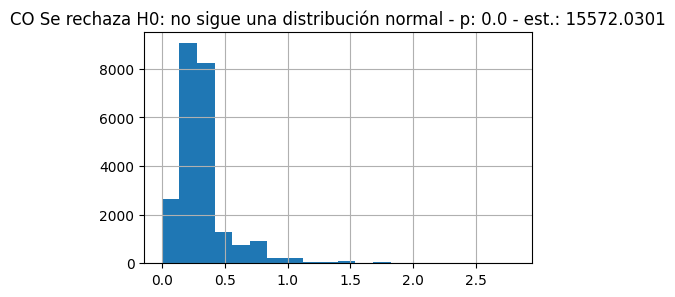

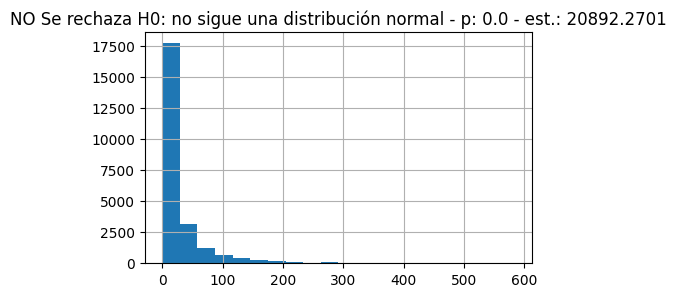

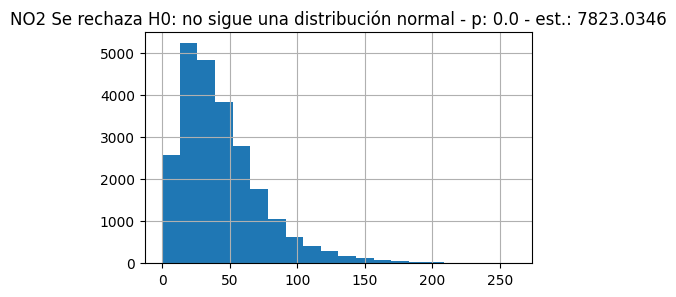

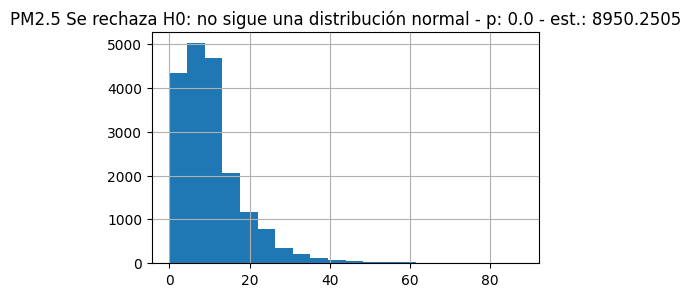

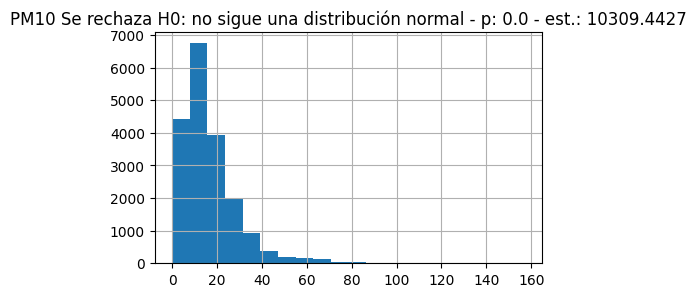

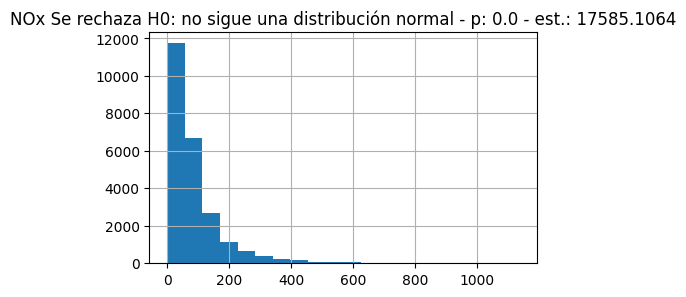

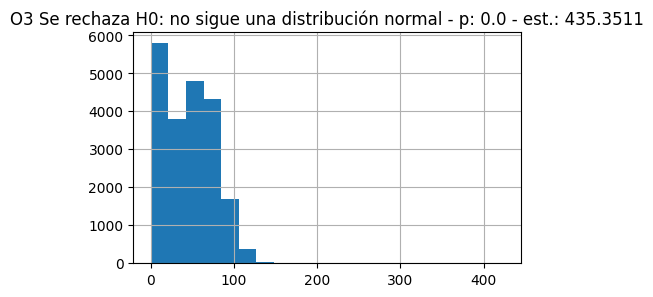

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

def normales(df,columns):
    for c in columns:
        fig, ax = plt.subplots(figsize=(5, 3))
        df[c].hist(bins=20)
        msg,p,k = normal(df[c])
        plt.title(f"{c} {msg} - p: {p} - est.: {k}")
        plt.show()
        
normales(df_conta,["CO", "NO", "NO2", "PM2.5", "PM10", "NOx", "O3"])        

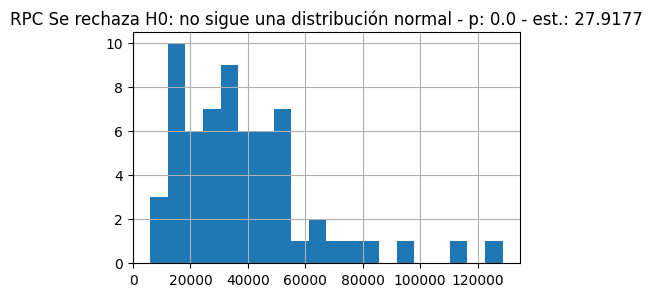

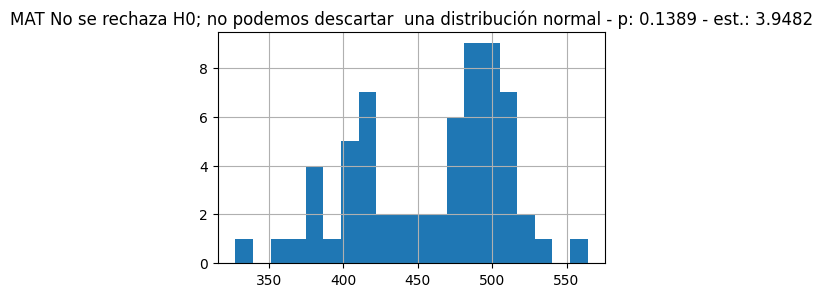

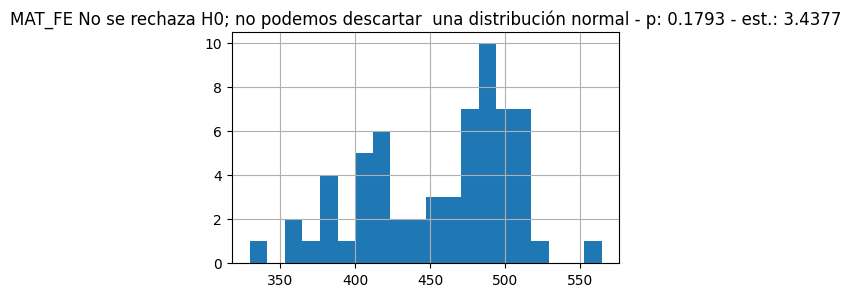

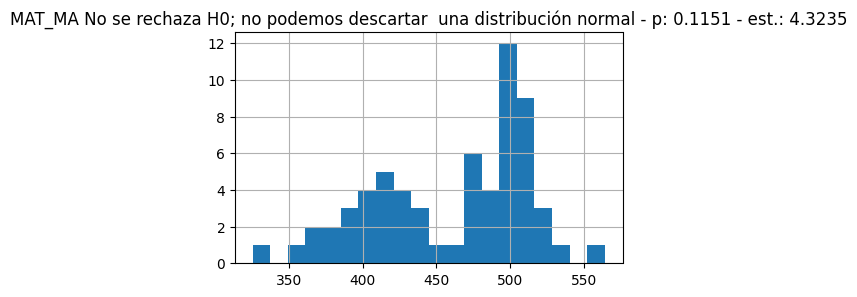

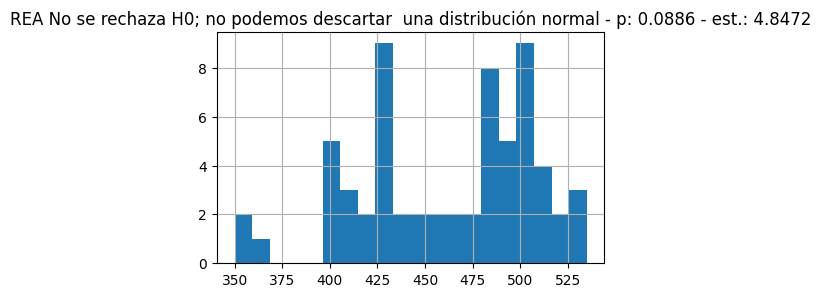

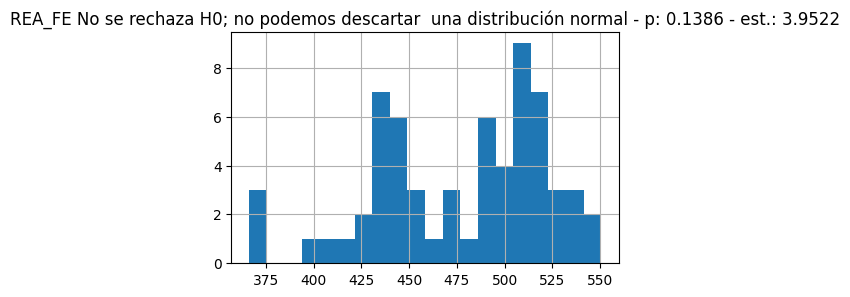

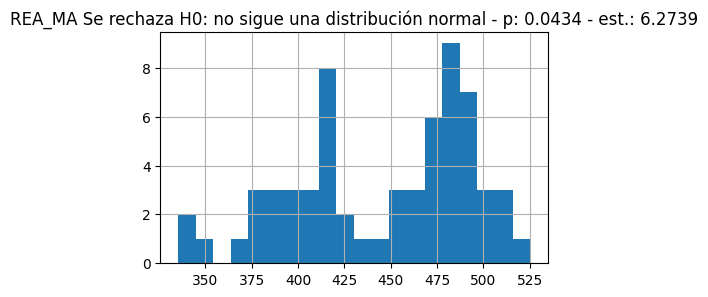

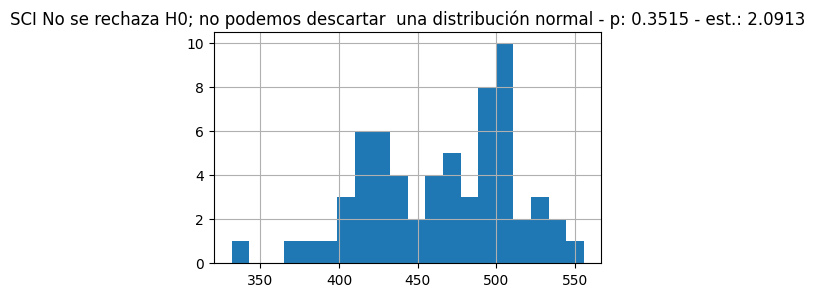

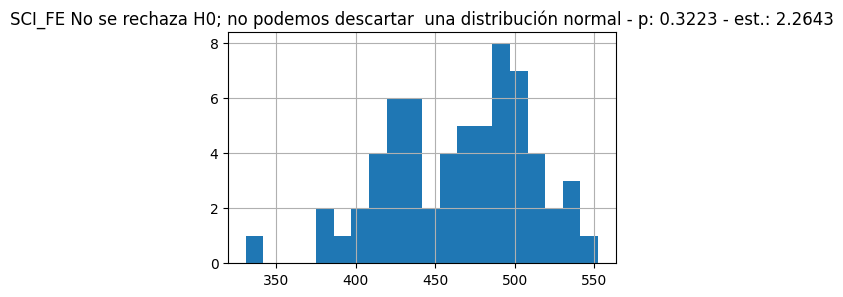

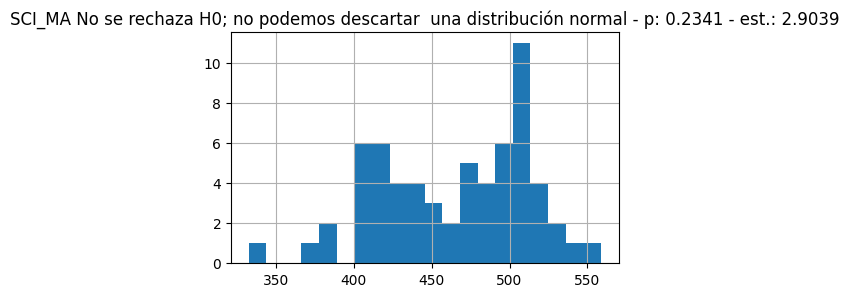

In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/PisaDataClean.csv"
df_pisa = pd.read_csv(url)
# nos quedamos solo con los datos que sean números (asumimos que hemos comprobado que todos son ratio o intervalo)
df_pisa_num = df_pisa.select_dtypes(include=["number"])
normales(df_pisa_num,df_pisa_num.columns) 

<a name="BOX-COX"></a>
## BOX-COX

En ocasiones es de gran interés lograr que las variables sigan un normal. Para ello existen diversas transformaciones. Una de las más populares es la Box-Cox, definido como 

    y = (x**lmbda - 1) / lmbda,  for lmbda != 0
        log(x),                  for lmbda = 0
    
Vamos a utilizar una implementación que permite dejar sin definir el parámetro lambda     

In [8]:
from scipy.stats import boxcox

# tiene que ser una variable positiva
data = df_conta[df_conta.NO2>0].NO2
xt, r = stats.boxcox(data)
xt,r

(array([6.88946173, 7.17389457, 6.85616522, ..., 8.89445803, 8.43291174,
        7.72658474]),
 0.20573244507056154)

In [9]:
print(normal(xt))
print(normal(df_conta.NO2))

('Se rechaza H0: no sigue una distribución normal', 0.0, 24.218)
('Se rechaza H0: no sigue una distribución normal', 0.0, 7823.0346)


array([[<AxesSubplot: title={'center': 'x'}>]], dtype=object)

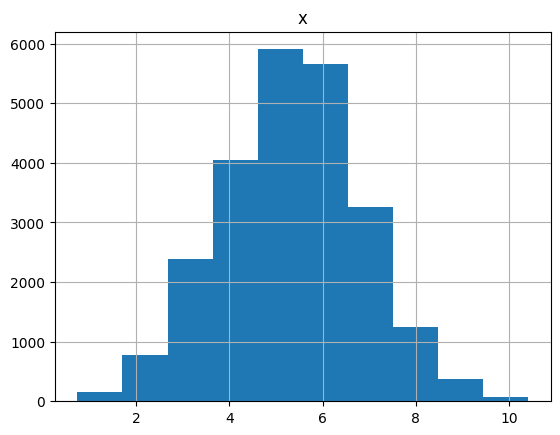

In [10]:
pd.DataFrame(xt,columns=["x"]).hist()

<a name="Curtosis"></a>
## Curtosis y asimetría

Ya hemos visto que las funciones de pandas skew y kurtosis nos indican la asimetría y la curtosis;

`skew` de Pandas:

        >0 : Asimetría a la derecha o positiva
        aprox. 0 : simétrico
        <0 : asimetría a la izquierda o negativa
        
        
`kurtosis` de Pandas:

        >0 : leptocúrtica ; los outliers tienen más peso que en la normal, tenemos muchos outliers (hay que ver por qué y si merece la pena hacer un estudio solo de esta parte)
        aprox. 0 : similar a una normal
        <0 : los outliers tienen menos peso que en la normal, la distribución está más concentrada alrededor de la media
        
        
Sin embargo queda la duda de que significa "aproximadamente 0"; para eso la bibliteca `scipy` tiene 2 test que nos permiten saber si se puede considerar 0 o no el valor devuelto. En ambos casos $H_0$ es que el valor es 0

In [11]:
from scipy.stats import skew,skewtest,kurtosis,kurtosistest

def asimetría(x):
    s = skew(x,nan_policy='omit')
    e,p  = skewtest(x,nan_policy='omit')
    msg = ("Asimetría a la derecha " if s > 0 else "asimetría negativa" ) if p<0.05 else "no se puede asegurar que sea !=0"
    return s,e,p,msg

In [12]:
asimetría(normaldata)

(-0.0019284479225361445,
 -0.2489799935831908,
 0.8033762570001662,
 'no se puede asegurar que sea !=0')

In [13]:
s,e,p,msg = asimetría(df_conta.PM10)
s,e,p,msg

(2.403888858909776, 82.77412624911341, 0.0, 'Asimetría a la derecha ')

In [14]:
s,e,p,msg = asimetría(df_pisa.MAT)
s,e,p,msg

(-0.4615205050238921,
 -1.580611752525267,
 0.11396683696780896,
 'no se puede asegurar que sea !=0')

<AxesSubplot: >

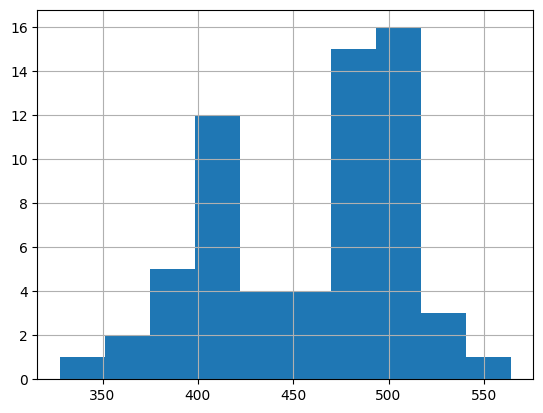

In [15]:
df_pisa.MAT.hist()

In [16]:
msg,p,k = normal(df_pisa.MAT)
msg,p,k

('No se rechaza H0; no podemos descartar  una distribución normal',
 0.1389,
 3.9482)

In [17]:
def curtosis(x):
    k = kurtosis(x,nan_policy='omit')
    e,p  = kurtosistest(x,nan_policy='omit')
    msg = ("Leptocúrtica " if k > 0 else "platicúrtica" ) if p<0.05 else "no se puede asegurar que sea !=0"
    return k,e,p,msg

curtosis(normaldata)

(-0.0013758440204063582,
 -0.07726406233791963,
 0.9384134795140006,
 'no se puede asegurar que sea !=0')

In [18]:
k,e,p,msg = curtosis(df_conta.PM10)
k,e,p,msg

(10.841166480958316, 58.80379871182659, 0.0, 'platicúrtica')

In [19]:
k,e,p,msg = asimetría(df_pisa.MAT)
k,e,p,msg

(-0.4615205050238921,
 -1.580611752525267,
 0.11396683696780896,
 'no se puede asegurar que sea !=0')

<a name="Medias"></a>
## Poblaciones diferentes



Supongamos que tenemos 2 monedas, en la primera nos salen 2 caras seguidas, en la segunda 2 cruces seguidas ¿podemos asegurar que son monedas diferentes? Casi todos estaremos de acuerdo en que no, en que la diferencia se puede deber al azar. Eso sí, si tiramos cada moneda 1000 veces y en la primera sale por ejemplo un 30% más de caras que en la segunda puede que sospechemos que sí lo sean. Estas ideas son las que implementan los tests que comparan las medias de dos variables. Vamos a ver 2:

- t de student: solo aplicable bajo ciertas circunstancias (es un test paramétrico): normalidad de ambas variables, misma varianza...

- Kolmogorov-Sminorv: se puede aplicar a cualquier pareja de variables (pero es más exigente)

En ambos casos la hipótesis nula (que rechazaremos si p<0.05) es que la media es la misma

### Test t-student

In [43]:
from scipy.stats import ttest_ind
x1 =  np.random.randn(100000)
x2 = np.random.randn(100000)
ttest_ind(x1, x2)

Ttest_indResult(statistic=0.2862474755495381, pvalue=0.7746888805142882)

como pvalue>0,05 no podemos rechazar la hipótesis de que la media es muy similar 

In [44]:
from scipy.stats import ttest_ind
x1 = np.random.randn(100000)+1
x2 = np.random.randn(100000)
ttest_ind(x1, x2)

Ttest_indResult(statistic=222.9401253273918, pvalue=0.0)

Podemos rechazar que ambas medias sean iguales

### Kolmogorov-Smirnov

Realmente este test no busca comparar medidas sino ver si dos muestras proceden de la misma población. Veamos un ejemplo

In [1]:
import pandas as pd
url = r"https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/madrid/Cont_Meteo_Traf.csv"
df_data =  pd.read_csv(url,parse_dates=['FECHAH'])
df_data["year"] = df_data.FECHAH.dt.year
df_data.columns

Index(['FECHAH', 'TIPO', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3',
       'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
       'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10', 'ES53', 'ESSUMA',
       'year'],
      dtype='object')

In [2]:
df_data.year.value_counts()

2020    8784
2019    8760
2021    8760
2018    1463
Name: year, dtype: int64

In [53]:
years = df_data.year.unique()
years = np.sort(years)
df_data_year = [df_data[df_data.year==y]["TEMPERATURA"] for y in years ]

In [54]:
for y in years[1:]:
    t = df_data[df_data.year==y]["TEMPERATURA"]
    print(y,normal(t))

2019 ('Se rechaza H0: no sigue una distribución normal', 0.0, 459.6129)
2020 ('Se rechaza H0: no sigue una distribución normal', 0.0, 455.8055)
2021 ('Se rechaza H0: no sigue una distribución normal', 0.0, 159.3686)


No son normales, aunque se acerca bastante, vamos a utilizar el test de kolmogorov-smirnov para ver si la temperatura difiere en distintos años.

In [59]:
from scipy.stats import kstest

for y1 in years[1:]:
    for y2 in years[1:]:
        if y2>=y1:
            t1 = df_data[df_data.year==y1]["TEMPERATURA"]
            t2 = df_data[df_data.year==y2]["TEMPERATURA"]
            print(y1,y2,kstest(t1, t2),round(t1.mean(),2),round(t2.mean(),2))
            

2019 2019 KstestResult(statistic=0.0, pvalue=1.0) 16.66 16.66
2019 2020 KstestResult(statistic=0.05352415350450383, pvalue=2.29002790681484e-11) 16.66 17.19
2019 2021 KstestResult(statistic=0.04817351598173516, pvalue=2.946095251879445e-09) 16.66 16.27
2020 2020 KstestResult(statistic=0.0, pvalue=1.0) 17.19 17.19
2020 2021 KstestResult(statistic=0.07745839259425606, pvalue=2.4528275868806326e-23) 17.19 16.27
2021 2021 KstestResult(statistic=0.0, pvalue=1.0) 16.27 16.27


Todos los años corresponden a temperaturas diferentes con una diferencia estadísticamente signficativa